# Project: European Soccer Database

Table of Contents:

. Introduction                                                                                                                                                                                                                   

. Data Wrangling


. Exploratory Data Analysis


. Conclusions

# Introduction



In this project I will analyze the soccer database from several European countries.

Soccer plays an important role in our world. It does not only entertain people, but also keeps to attract huge amount of money during games. Such games gather millions of people on stadiums and in front of TVs. Many fans bet on their favorite teams. Some of them win and a lot of them loose their money. 



The following questions will be explored during the analysis:

1)which teams scored more goals in home & away games?

2)Who are the top potential players rating during this period of time?

3)And Do the potential players affect or improve their teams scoring goals ?

4)What are the player attributes that contribute to the players potential?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

In [944]:
# Load  data and print out some lines:
df_country = pd.read_csv('Country.csv')
df_league=pd.read_csv('League.csv')
df_match=pd.read_csv('Match.csv')
df_player=pd.read_csv('Player.csv')
df_player_attributes=pd.read_csv('Player_Attributes.csv')
df_sqlite_sequence=pd.read_csv('sqlite_sequence.csv')
df_team= pd.read_csv('Team.csv')
df_team_attributes=pd.read_csv('Team_Attributes.csv')

In [945]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [946]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [948]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [949]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [950]:
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [951]:
df_sqlite_sequence.head()

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075


In [952]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [953]:
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [954]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [955]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [956]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [957]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [958]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [959]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [960]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

#find duplicate rows in each dataset

In [961]:
sum(df_country.duplicated())

0

In [962]:
sum(df_league.duplicated())

0

In [963]:
sum(df_match.duplicated())

0

In [964]:
sum(df_player.duplicated())

0

In [965]:
sum(df_player_attributes.duplicated())

0

In [966]:
sum(df_team.duplicated())

0

In [967]:
sum(df_team_attributes.duplicated())

0

In [968]:
#columns with missing values

In [969]:
df_country.columns[df_country.isnull().any()]

Index([], dtype='object')

In [970]:
df_league.columns[df_league.isnull().any()]

Index([], dtype='object')

In [971]:
df_match.columns[df_match.isnull().any()]

Index(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=104)

In [972]:
df_player.columns[df_player.isnull().any()]

Index([], dtype='object')

In [973]:
df_player_attributes.columns[df_player_attributes.isnull().any()]

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [974]:
df_team.columns[df_team.isnull().any()]

Index(['team_fifa_api_id'], dtype='object')

In [975]:
df_team_attributes.columns[df_team_attributes.isnull().any()]

Index(['buildUpPlayDribbling'], dtype='object')

In [976]:
#No of leagues:
df_match['league_id'].nunique()

11

In [977]:
#No of seasons:
df_match['season'].nunique()

8

In [978]:
#No of players:
df_player['player_name'].nunique()

10848

In [979]:
#No of teams:
df_team['team_long_name'].nunique()

296

In [980]:
#Most matches played in each league during this period of time

df_league_match=pd.merge(df_league , df_match , on='country_id')
df_league_match.groupby('name')['league_id'].count().sort_values(ascending= False)

name
England Premier League      3040
France Ligue 1              3040
Spain LIGA BBVA             3040
Italy Serie A               3017
Germany 1. Bundesliga       2448
Netherlands Eredivisie      2448
Portugal Liga ZON Sagres    2052
Poland Ekstraklasa          1920
Scotland Premier League     1824
Belgium Jupiler League      1728
Switzerland Super League    1422
Name: league_id, dtype: int64

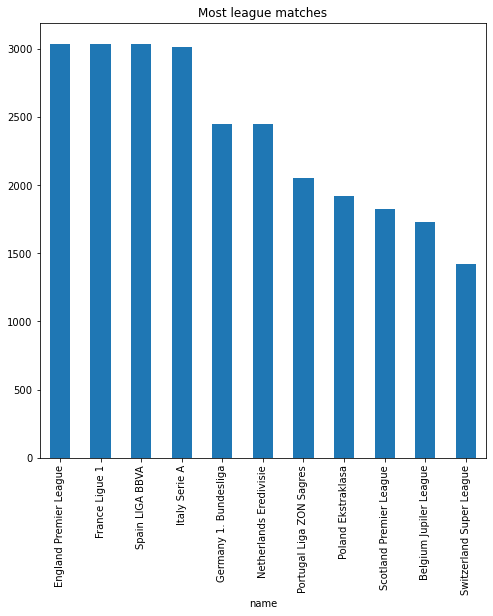

In [981]:
df_league_match.groupby('name')['league_id'].count(). sort_values(ascending= False).plot(kind='bar',title='Most league matches',figsize=(8,8));

from all the above we found:

-No duplicate rows

-No of columns with missing values

-No of matches played in each league during this period of time

-No of leagues: 11

-No of seasons: 8

-No of players:10848

-No of teams:296 

# Data Cleaning

In [982]:
df_match.drop(df_match.iloc[:,11:], axis=1, inplace=True)
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [983]:
df_match['home_team_name'] = df_match['home_team_api_id'].apply(lambda x: df_team.query(f'team_api_id == {x}')['team_long_name'].values[0])
df_match['away_team_name'] = df_match['away_team_api_id'].apply(lambda x: df_team.query(f'team_api_id == {x}')['team_long_name'].values[0])

In [984]:
df_match.head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,FCV Dender EH,Standard de Liège
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,1,KV Mechelen,Club Brugge KV
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,2,KSV Roeselare,KV Kortrijk
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,2,Tubize,Royal Excel Mouscron
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,0,KVC Westerlo,Sporting Charleroi
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,1,Club Brugge KV,KV Kortrijk


In [985]:
df_match = df_match[['id','country_id','league_id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_name','home_team_goal','away_team_goal','away_team_name']]
df_match.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_name,home_team_goal,away_team_goal,away_team_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,KRC Genk,1,1,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,SV Zulte-Waregem,0,0,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,KSV Cercle Brugge,0,3,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,KAA Gent,5,0,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,FCV Dender EH,1,3,Standard de Liège


In [986]:
df_match.set_index('id')

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_name,home_team_goal,away_team_goal,away_team_name
id,,,,,,,,,,,,
1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,KRC Genk,1,1,Beerschot AC
2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,SV Zulte-Waregem,0,0,Sporting Lokeren
3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,KSV Cercle Brugge,0,3,RSC Anderlecht
4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,KAA Gent,5,0,RAEC Mons
5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,FCV Dender EH,1,3,Standard de Liège
...,...,...,...,...,...,...,...,...,...,...,...,...
25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,FC St. Gallen,1,0,FC Thun
25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,FC Vaduz,1,2,FC Luzern
25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,Grasshopper Club Zürich,2,0,FC Sion


In [987]:
df_player_attributes['player'] = df_player_attributes['player_api_id'].apply(lambda x: df_player.query(f'player_api_id == {x}')['player_name'].values[0])
df_player_attributes.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell


In [989]:
df_player_att=df_player_attributes[['player','potential','finishing','heading_accuracy','dribbling','free_kick_accuracy','sprint_speed','stamina','penalties']]
df_player_att.head(10)

,player,potential,finishing,heading_accuracy,dribbling,free_kick_accuracy,sprint_speed,stamina,penalties
0,Aaron Appindangoye,71.0,44.0,71.0,51.0,39.0,64.0,54.0,48.0
1,Aaron Appindangoye,71.0,44.0,71.0,51.0,39.0,64.0,54.0,48.0
2,Aaron Appindangoye,66.0,44.0,71.0,51.0,39.0,64.0,54.0,48.0
3,Aaron Appindangoye,65.0,43.0,70.0,50.0,38.0,64.0,54.0,47.0
4,Aaron Appindangoye,65.0,43.0,70.0,50.0,38.0,64.0,54.0,47.0
5,Aaron Cresswell,76.0,53.0,58.0,73.0,69.0,78.0,79.0,59.0
6,Aaron Cresswell,76.0,53.0,58.0,73.0,69.0,78.0,79.0,59.0
7,Aaron Cresswell,75.0,52.0,57.0,71.0,69.0,78.0,79.0,59.0
8,Aaron Cresswell,75.0,51.0,57.0,71.0,69.0,78.0,79.0,59.0
9,Aaron Cresswell,75.0,51.0,57.0,71.0,69.0,78.0,79.0,59.0


# Exploratory Data Analysis

 # which teams scored more goals in home & away games?

In [990]:
# create dataframe with most teams scored home goals :


result = {}
for name in df_match.home_team_name.unique():
    result[name] = 0


for score, home_team in zip(df_match.home_team_goal,df_match.home_team_name):
        result[ home_team ] += score
        
        result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse = True)}
        
        my_dict = result
top_home_team_scores= pd.DataFrame(list(my_dict.items()),columns = ['Home_team','Score_home'])
top_home_team_scores.head(10)

,Home_team,Score_home
0,Real Madrid CF,505
1,FC Barcelona,495
2,Celtic,389
3,FC Bayern Munich,382
4,PSV,370
5,Manchester City,365
6,Ajax,360
7,FC Basel,344
8,Manchester United,338
9,Chelsea,333


In [991]:
# create dataframe with most teams scored away goals :

result = {}
for name in df_match.away_team_name.unique():
    result[name] = 0


for score, away_team in zip(df_match.away_team_goal,df_match.away_team_name):
        result[ away_team ] += score
        
        result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse = True)}
        
        my_dict = result
top_away_team_scores= pd.DataFrame(list(my_dict.items()),columns = ['Away_team','Score_away'])
top_away_team_scores.head(10)

,Away_team,Score_away
0,FC Barcelona,354
1,Real Madrid CF,338
2,Celtic,306
3,Ajax,287
4,PSV,282
5,FC Basel,275
6,FC Bayern Munich,271
7,Arsenal,267
8,Borussia Dortmund,253
9,Chelsea,250


In [993]:
# create dataframe with most teams scored home & away goals during the time period:

home_away_goals=pd.merge(top_home_team_scores,top_away_team_scores, left_index=True, right_index=True)
home_away_goals.head(10)

,Home_team,Score_home,Away_team,Score_away
0,Real Madrid CF,505,FC Barcelona,354
1,FC Barcelona,495,Real Madrid CF,338
2,Celtic,389,Celtic,306
3,FC Bayern Munich,382,Ajax,287
4,PSV,370,PSV,282
5,Manchester City,365,FC Basel,275
6,Ajax,360,FC Bayern Munich,271
7,FC Basel,344,Arsenal,267
8,Manchester United,338,Borussia Dortmund,253
9,Chelsea,333,Chelsea,250


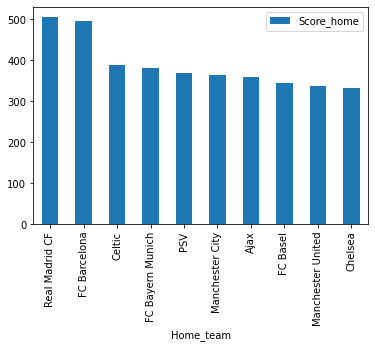

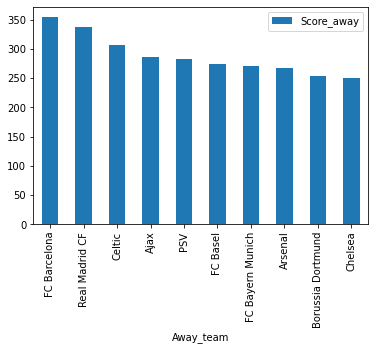

In [994]:
# show on graph the results :

home_away_goals.head(10).plot(x='Home_team' , y='Score_home', kind = 'bar');
home_away_goals.head(10).plot(x='Away_team' , y='Score_away', kind = 'bar');


 We can mention that the top 2 teams with most scored goals in both cases home or away goals are : Barcelona & Real Madrid 

# Who are the top potential players rating during this period of time?

# And Do the potential players affect or improve their teams scoring goals ?

In [995]:
# top potential players rating:

df_potential =pd.merge(df_player ,df_player_attributes  , on = 'player_api_id',how='inner')

df_potential.groupby('player_name')['potential'].max().sort_values(ascending =False).head(10)

player_name
Lionel Messi          97.0
Cristiano Ronaldo     95.0
Ronaldinho            95.0
Robinho               94.0
Neymar                94.0
Zlatan Ibrahimovic    94.0
Andres Iniesta        93.0
Kaka                  93.0
Gianluigi Buffon      93.0
Andrea Pirlo          93.0
Name: potential, dtype: float64

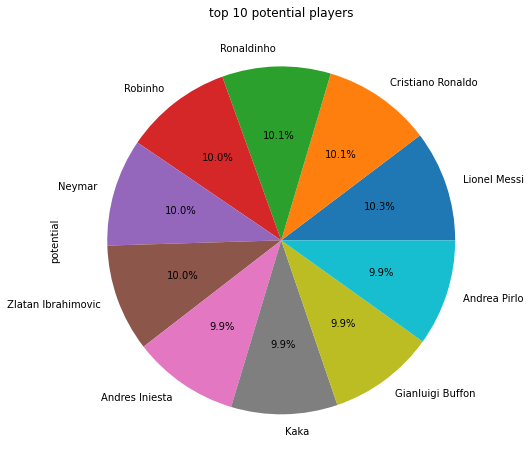

In [996]:
df_potential.groupby('player_name')['potential'].max().sort_values(ascending = False).head(10).plot(kind = 'pie', autopct='%1.1f%%',figsize=(8,8),title= 'top 10 potential players');

-As we recognize here : Barcelona & Real Madrid have the big part of the pie from the top 10 potential players during the time period.

Barcelona : 5 players
Real Madrid : 3 players

-We can say that potential players helped teams to improve more .

# What are the player attributes that contribute to the players potential?

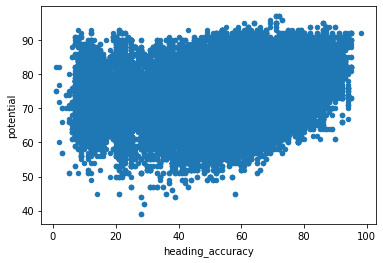

In [997]:
# relationship between  heading accuracy and potential :

df_player_att.plot(x='heading_accuracy', y='potential', kind='scatter');

Positive correlation between heading accuracy and player potential

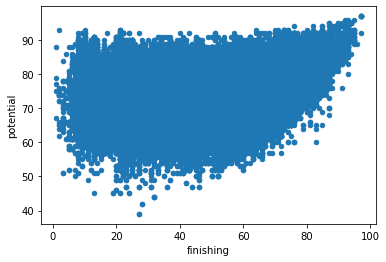

In [998]:
# relationship between  finishing and potential :

df_player_att.plot(x='finishing', y='potential', kind='scatter');

 not very positive correlation between finishing and player potential

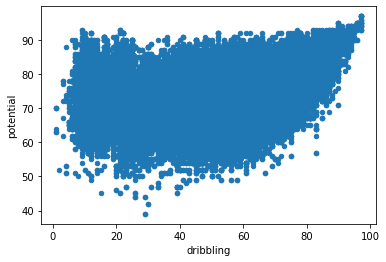

In [999]:
# relationship between  dribbling and potential :

df_player_att.plot(x='dribbling', y='potential', kind='scatter');

not positive correlation between dribbling and player potential

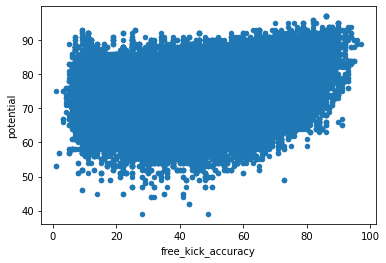

In [1000]:
# relationship between free_kick_accuracy and potential :

df_player_att.plot(x='free_kick_accuracy', y='potential', kind='scatter');

positive correlation between free_kick_accuracy and player potential

# Conclusion


 -We can say that a detailed data analysis has been performed. The answers to four stated questions were obtained.
 
 -Firstly, we have found that the best two teams in scoring maximum number of goals in home games were( Real Madrid CF with 505
goals then FC Barcelona	with 495goals) , while the best two teams in scoring maximum number of goals in home games were         ( FC Barcelona with 354 goals then Real Madrid CF with 338) .

 -Then we looked for the potential players in this period of time to see if there is a relation between the potential players and this clear superiority for thoses 2 teams in scoring home & away goals that let them take the lead in both cases home or away.
As we realized that 8 players of the top 10 potential players played for both FC Barcelona = 5 & Real Madrid = 3 .


 -Finally , we dicussed the relationship between some player attributes and the potential player ratings to figure correlation between them . Some of them had positive correlation while the others hadn't strong correlation .




# limitation

-During the analysis of this project I found some limitations.

-The name of the players were incomplete.

-Also I could not  link the players to the teams as there was no correlation between them.

In [1001]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295